In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Import Data

In [0]:
df = spark.read.csv("/FileStore/tables/Billionaires_Statistics_Dataset.csv", inferSchema = True, header = True)

In [0]:
df.printSchema()

root
 |-- rank: integer (nullable = true)
 |-- finalWorth: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- personName: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- city: string (nullable = true)
 |-- source: string (nullable = true)
 |-- industries: string (nullable = true)
 |-- countryOfCitizenship: string (nullable = true)
 |-- organization: string (nullable = true)
 |-- selfMade: boolean (nullable = true)
 |-- status: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthDate: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- title: string (nullable = true)
 |-- date: string (nullable = true)
 |-- state: string (nullable = true)
 |-- residenceStateRegion: string (nullable = true)
 |-- birthYear: integer (nullable = true)
 |-- birthMonth: integer (nullable = true)
 |-- birthDay: integer (nullable = true)
 |-- cpi_country: d

#### Data Preprocessing

**Drop First Name, Last Name, BirthDate and date Columns** <br><br>
Because they are irrelevant or present in another column

In [0]:
df = df.drop("firstName", "lastName", "birthDate", "date")

**Drop Duplicates**

In [0]:
df = df.dropDuplicates()

**Find count of NULL values**

In [0]:
from pyspark.sql.functions import col, isnan

null_counts = []
df2 = df.drop("selfMade")

for col_name in df2.columns:
    # Count NULL values in the current column and store the result in a tuple (column_name, count)
    count = df2.where(col(col_name).isNull() | isnan(col(col_name))).count()
    null_counts.append((col_name, count))

# Display the NULL counts for each column
for col_name, count in null_counts:
    print(f"Column '{col_name}' has {count} NULL values.")

Column 'rank' has 0 NULL values.
Column 'finalWorth' has 0 NULL values.
Column 'category' has 0 NULL values.
Column 'personName' has 0 NULL values.
Column 'age' has 65 NULL values.
Column 'country' has 38 NULL values.
Column 'city' has 72 NULL values.
Column 'source' has 0 NULL values.
Column 'industries' has 0 NULL values.
Column 'countryOfCitizenship' has 0 NULL values.
Column 'organization' has 2315 NULL values.
Column 'status' has 0 NULL values.
Column 'gender' has 0 NULL values.
Column 'title' has 2301 NULL values.
Column 'state' has 1887 NULL values.
Column 'residenceStateRegion' has 1893 NULL values.
Column 'birthYear' has 76 NULL values.
Column 'birthMonth' has 76 NULL values.
Column 'birthDay' has 76 NULL values.
Column 'cpi_country' has 184 NULL values.
Column 'cpi_change_country' has 184 NULL values.
Column 'gdp_country' has 164 NULL values.
Column 'gross_tertiary_education_enrollment' has 182 NULL values.
Column 'gross_primary_education_enrollment_country' has 181 NULL valu

In [0]:
print(f"Number of entries per column:  {df.count()}")

Number of entries per column:  2640


**Drop columns with huge amount of missing values (threshold of 1000)**

In [0]:
df = df.drop("organization", "title", "state", "residenceStateRegion")

**Type Conversion**

In [0]:
from pyspark.sql.types import IntegerType, LongType, StringType
from pyspark.sql.functions import regexp_replace, col

# replacing [$], [,] and [SPACE] with empty character
df = df.withColumn("gdp_country", regexp_replace(col("gdp_country"), "[$, ]", ""))

df = df.withColumn("gdp_country", df['gdp_country'].cast(LongType()))
df = df.withColumn("selfMade", df['selfMade'].cast(StringType())) # convert to string first, just to check null value, will convert back to boolean later

In [0]:
df.printSchema()

root
 |-- rank: integer (nullable = true)
 |-- finalWorth: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- personName: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- city: string (nullable = true)
 |-- source: string (nullable = true)
 |-- industries: string (nullable = true)
 |-- countryOfCitizenship: string (nullable = true)
 |-- selfMade: string (nullable = true)
 |-- status: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthYear: integer (nullable = true)
 |-- birthMonth: integer (nullable = true)
 |-- birthDay: integer (nullable = true)
 |-- cpi_country: double (nullable = true)
 |-- cpi_change_country: double (nullable = true)
 |-- gdp_country: long (nullable = true)
 |-- gross_tertiary_education_enrollment: double (nullable = true)
 |-- gross_primary_education_enrollment_country: double (nullable = true)
 |-- life_expectancy_country: double (nullable = true)
 |-- tax_revenue_c

In [0]:
null_counts = []

for col_name in df.columns:
    # Count NULL values in the current column and store the result in a tuple (column_name, count)
    count = df.where(col(col_name).isNull() | isnan(col(col_name))).count()
    null_counts.append((col_name, count))

# Display the NULL counts for each column
for col_name, count in null_counts:
    print(f"Column '{col_name}' has {count} NULL values.")

Column 'rank' has 0 NULL values.
Column 'finalWorth' has 0 NULL values.
Column 'category' has 0 NULL values.
Column 'personName' has 0 NULL values.
Column 'age' has 65 NULL values.
Column 'country' has 38 NULL values.
Column 'city' has 72 NULL values.
Column 'source' has 0 NULL values.
Column 'industries' has 0 NULL values.
Column 'countryOfCitizenship' has 0 NULL values.
Column 'selfMade' has 0 NULL values.
Column 'status' has 0 NULL values.
Column 'gender' has 0 NULL values.
Column 'birthYear' has 76 NULL values.
Column 'birthMonth' has 76 NULL values.
Column 'birthDay' has 76 NULL values.
Column 'cpi_country' has 184 NULL values.
Column 'cpi_change_country' has 184 NULL values.
Column 'gdp_country' has 164 NULL values.
Column 'gross_tertiary_education_enrollment' has 182 NULL values.
Column 'gross_primary_education_enrollment_country' has 181 NULL values.
Column 'life_expectancy_country' has 182 NULL values.
Column 'tax_revenue_country_country' has 183 NULL values.
Column 'total_tax

In [0]:
from pyspark.sql.types import BooleanType
from pyspark.sql.functions import when

#no missing gender/selfMade, convert to BooleanType, because it was not possible to show missing boolean values
#df = df.withColumn("gender", df['gender'].cast(BooleanType()))
df = df.withColumn('gender', when(df['gender'] == 'M', 'M').otherwise('F'))
df = df.withColumn("selfMade", df['selfMade'].cast(BooleanType()))

**Fill missing numerical values with their corresponding column mean**

In [0]:
from pyspark.sql.functions import mean, format_number

columns_to_fill = [
    'finalWorth',
    'age',
    'birthYear',
    'birthMonth',
    'birthDay',
    'cpi_country',
    'cpi_change_country',
    'gdp_country',
    'gross_tertiary_education_enrollment',
    'gross_primary_education_enrollment_country',
    'life_expectancy_country',
    'tax_revenue_country_country',
    'total_tax_rate_country',
    'population_country',
    'latitude_country',
    'longitude_country'
]

# Iterate through the columns to fill NULL values with their mean
for column_name in columns_to_fill:
    # Calculate the mean value for the column
    mean_value = df.select(mean(column_name)).first()[0]
    
    # Fill NULL values in the column with the calculated mean value
    df = df.fillna({column_name: mean_value})

**Fill missing string values with their corresponding column mode**

In [0]:
column_name = 'country'
df3 = df.where(col('country').isNotNull())
df3.registerTempTable('table')
mode_value = (spark.sql('SELECT country, COUNT(country) AS count FROM table GROUP BY country ORDER BY count desc')).first()["country"]
df = df.fillna({column_name : mode_value})

column_name = "city"
df4 = df.where(col('country').isNotNull())
df4.registerTempTable('table')
mode_value = (spark.sql('SELECT city, COUNT(city) AS count FROM table GROUP BY city ORDER BY count desc')).first()["city"]
df = df.fillna({column_name : mode_value})


/databricks/spark/python/pyspark/sql/dataframe.py:331: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [0]:
df2 = df.drop("gender", "selfMade") # drop boolean value first

null_counts = []

for col_name in df2.columns:
    # Count NULL values in the current column and store the result in a tuple (column_name, count)
    count = df2.where(col(col_name).isNull() | isnan(col(col_name))).count()
    null_counts.append((col_name, count))

# Display the NULL counts for each column
for col_name, count in null_counts:
    print(f"Column '{col_name}' has {count} NULL values.")

Column 'rank' has 0 NULL values.
Column 'finalWorth' has 0 NULL values.
Column 'category' has 0 NULL values.
Column 'personName' has 0 NULL values.
Column 'age' has 0 NULL values.
Column 'country' has 0 NULL values.
Column 'city' has 0 NULL values.
Column 'source' has 0 NULL values.
Column 'industries' has 0 NULL values.
Column 'countryOfCitizenship' has 0 NULL values.
Column 'status' has 0 NULL values.
Column 'birthYear' has 0 NULL values.
Column 'birthMonth' has 0 NULL values.
Column 'birthDay' has 0 NULL values.
Column 'cpi_country' has 0 NULL values.
Column 'cpi_change_country' has 0 NULL values.
Column 'gdp_country' has 0 NULL values.
Column 'gross_tertiary_education_enrollment' has 0 NULL values.
Column 'gross_primary_education_enrollment_country' has 0 NULL values.
Column 'life_expectancy_country' has 0 NULL values.
Column 'tax_revenue_country_country' has 0 NULL values.
Column 'total_tax_rate_country' has 0 NULL values.
Column 'population_country' has 0 NULL values.
Column 'lat

In [0]:
# display dataset, since the dataframe is wide, we display it in vertical form
df.show(n=10, truncate=30, vertical=True)

-RECORD 0--------------------------------------------------------------------
 rank                                       | 7                              
 finalWorth                                 | 94500                          
 category                                   | Media & Entertainment          
 personName                                 | Michael Bloomberg              
 age                                        | 81                             
 country                                    | United States                  
 city                                       | New York                       
 source                                     | Bloomberg LP                   
 industries                                 | Media & Entertainment          
 countryOfCitizenship                       | United States                  
 selfMade                                   | true                           
 status                                     | U                 

**Outlier Check**

#### Explanatory Data Analysis

In [0]:
df.printSchema()

root
 |-- rank: integer (nullable = true)
 |-- finalWorth: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- personName: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = false)
 |-- city: string (nullable = false)
 |-- source: string (nullable = true)
 |-- industries: string (nullable = true)
 |-- countryOfCitizenship: string (nullable = true)
 |-- selfMade: boolean (nullable = true)
 |-- status: string (nullable = true)
 |-- gender: string (nullable = false)
 |-- birthYear: integer (nullable = true)
 |-- birthMonth: integer (nullable = true)
 |-- birthDay: integer (nullable = true)
 |-- cpi_country: double (nullable = false)
 |-- cpi_change_country: double (nullable = false)
 |-- gdp_country: long (nullable = true)
 |-- gross_tertiary_education_enrollment: double (nullable = false)
 |-- gross_primary_education_enrollment_country: double (nullable = false)
 |-- life_expectancy_country: double (nullable = false)
 |-- tax_

In [0]:
print("After data cleaning, we have a total of ", len(df.columns), " columns and ", df.count(), " rows.")

After data cleaning, we have a total of  27  columns and  2640  rows.


In [0]:
from pyspark.sql.types import StringType, IntegerType, DoubleType, BooleanType

# Define your categorical and numerical columns based on their data types
categorical_cols = [col for col, dtype in df.dtypes if dtype == 'string']
numeric_cols = [col for col, dtype in df.dtypes if dtype in ['int', 'bigint', 'double']]
boolean_cols = [col for col, dtype in df.dtypes if dtype == 'boolean']

print(f'Number of Categorical Columns : {len(categorical_cols)}')
print(f'Number of Numerical Columns : {len(numeric_cols)}')
print(f'Number of Boolean Columns: {len(boolean_cols)}')

Number of Categorical Columns : 9
Number of Numerical Columns : 17
Number of Boolean Columns: 1


**Gender Distribution**

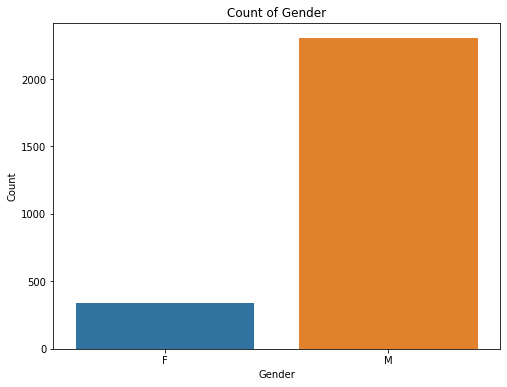

In [0]:
# Convert the PySpark DataFrame to Pandas for plotting
gender_counts = df.groupBy('gender').count().toPandas()

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_counts, x='gender', y='count')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Out[23]: Text(0.5, 1.0, 'The Proportion of Male and female from World Billionaires ')

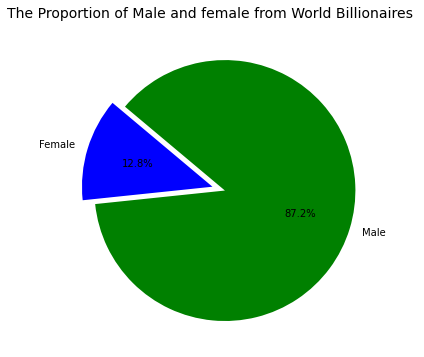

In [0]:
labels = ['Female', 'Male']
colors = ['blue', 'green']
explode = (0, 0.1)

plt.figure(figsize=(8,6))
plt.pie(gender_counts['count'], labels=labels, colors=colors, autopct= "%1.1f%%", startangle=140, explode=explode )

plt.title("The Proportion of Male and female from World Billionaires ", fontsize=14)

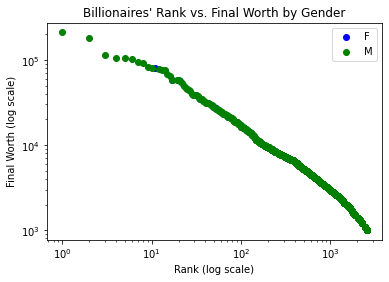

In [0]:
fig, ax = plt.subplots()
colors = {'M': 'green', 'F': 'blue'}  # Define colors for genders

for gender, data in df.toPandas().groupby('gender'):
    ax.scatter(data['rank'], data['finalWorth'], color=colors[gender], label=gender)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Rank (log scale)')
ax.set_ylabel('Final Worth (log scale)')
ax.set_title("Billionaires' Rank vs. Final Worth by Gender")
ax.legend()
plt.show()

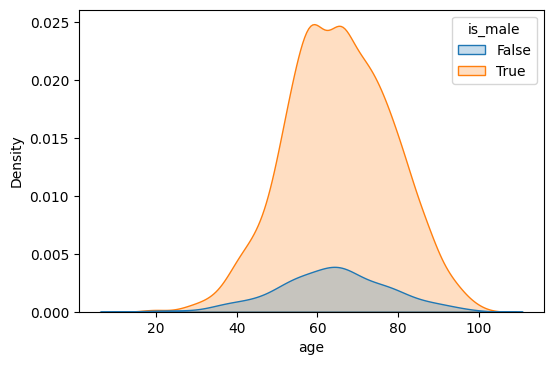

In [0]:
temp_df = df.withColumn('is_male', when(df['gender'] == 'M', True).otherwise(False))

plt.figure(dpi=100)
sns.kdeplot(data=temp_df.toPandas(), x='age', hue='is_male', fill=True)
plt.show()

In [0]:
import plotly.express as px

pandas_df = df.select("gender", "age").toPandas()

fig = px.box(pandas_df, x="gender", y="age", title="Age Distribution of Billionaires by Gender",
             color_discrete_sequence=['#FFA15A', '#00B2E2'])
fig.update_xaxes(title="Gender")
fig.update_yaxes(title="Age")
fig.show()

**Inferences:**<br><br>

- Based on the graph visualization, we can see that male has more billionaire than female in this dataset.<br>
- Based on the scatter plot, the top billionaire rankers are mostly males.<br>
- For male billionaire, most of them are around 50-70 years old.<br>
- Whereas for female billionaire, more of them are around 50-70 years old.

**Self Made Distribution**

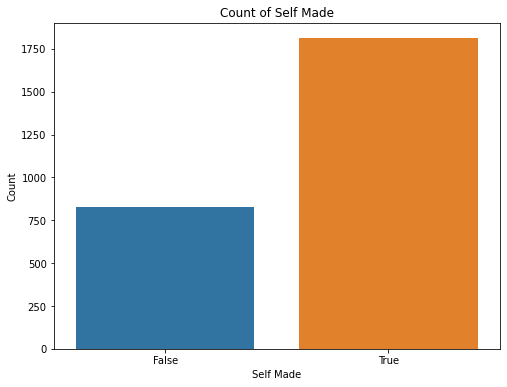

In [0]:
# Convert the PySpark DataFrame to Pandas for plotting
selfMade_counts = df.groupBy('selfMade').count().toPandas()

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=selfMade_counts, x='selfMade', y='count')
plt.title('Count of Self Made')
plt.xlabel('Self Made')
plt.ylabel('Count')
plt.show()

Out[28]: Text(0.5, 1.0, 'The Proportion of self_made and inheridate from World Billionaires ')

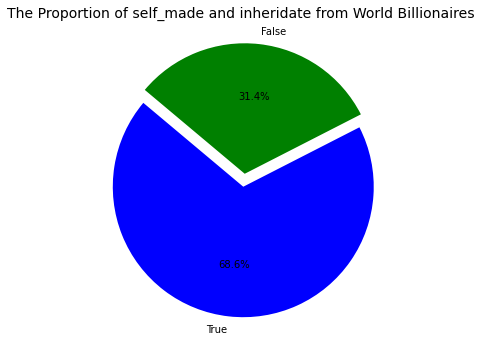

In [0]:
labels = ['True', 'False']
colors = ['blue', 'green']
explode = (0, 0.1)

plt.figure(figsize=(8,6))
plt.pie(selfMade_counts['count'], labels=labels, colors=colors, autopct= "%1.1f%%", startangle=140, explode=explode )
plt.title("The Proportion of self_made and inheridate from World Billionaires ", fontsize=14)

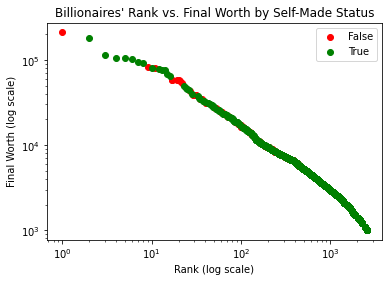

In [0]:
fig, ax = plt.subplots()
colors = {True: 'green', False: 'red'}  # Define colors for selfMade categories

for self_made, data in df.toPandas().groupby('selfMade'):
    ax.scatter(data['rank'], data['finalWorth'], color=colors[self_made], label=str(self_made))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Rank (log scale)')
ax.set_ylabel('Final Worth (log scale)')
ax.set_title("Billionaires' Rank vs. Final Worth by Self-Made Status")
ax.legend()
plt.show()

In [0]:
pandas_df = df.select("selfMade", "age").toPandas()

fig = px.box(pandas_df, x="selfMade", y="age", title="Age Distribution of Billionaires by Self Made",
             color_discrete_sequence=['#FFA15A', '#00B2E2'])
fig.update_xaxes(title="Self Made")
fig.update_yaxes(title="Age")
fig.show()

**Inferences:**<br><br>
- Based on the graph visualization, we can see that most billionaires are from self made, instead of inherited.<br>
- However, the richest billionaire is from inherited.<br>
- The youngest billionaire is from inherited, with age of 18.

**Status Distribution**

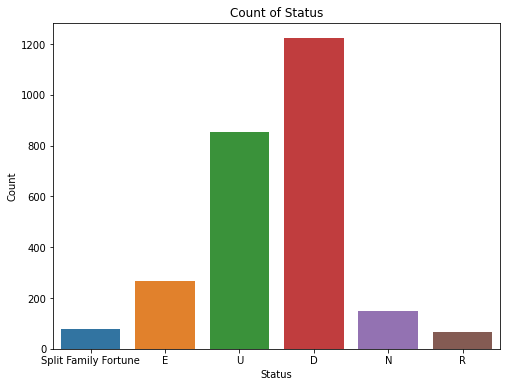

In [0]:
# Convert the PySpark DataFrame to Pandas for plotting
status_counts = df.groupBy('status').count().toPandas()

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=status_counts, x='status', y='count')
plt.title('Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Out[32]: Text(0.5, 1.0, 'The Proportion of status from World Billionaires ')

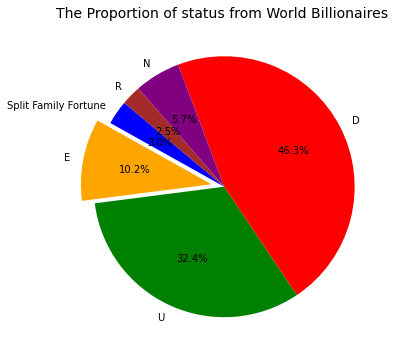

In [0]:
labels = ['Split Family Fortune', 'E', 'U', 'D', 'N', 'R']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
explode = (0, 0.1, 0, 0, 0, 0)

plt.figure(figsize=(8,6))
plt.pie(status_counts['count'], labels=labels, colors=colors, autopct= "%1.1f%%", startangle=140, explode=explode )
plt.title("The Proportion of status from World Billionaires ", fontsize=14)

In [0]:
pandas_df = df.select("status", "age").toPandas()

fig = px.box(pandas_df, x="status", y="age", title="Age Distribution of Billionaires by Self Made")
fig.update_xaxes(title="Self Made")
fig.update_yaxes(title="Age")
fig.show()

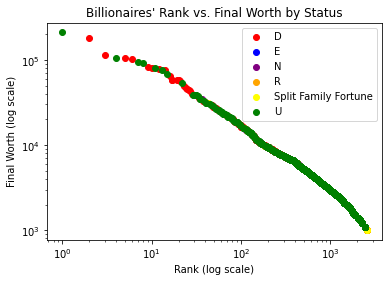

In [0]:
fig, ax = plt.subplots()
status_colors = {'U': 'green', 'D': 'red', 'E': 'blue', 'Split Family Fortune': 'yellow', 'N': 'purple', 'R': 'orange'}  # Define colors for status categories

for status, data in df.toPandas().groupby('status'):
    ax.scatter(data['rank'], data['finalWorth'], color=status_colors[status], label=status)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Rank (log scale)')
ax.set_ylabel('Final Worth (log scale)')
ax.set_title("Billionaires' Rank vs. Final Worth by Status")
ax.legend()
plt.show()

**Inferences:**<br><br>
- Based on the graph visualization, we notice that most of the billionaires are founders or entrepreneurs (class D), followed by inherited or unearned wealth (class U)<br>

**Age Distribution**

Out[35]: Text(0, 0.5, 'Count')

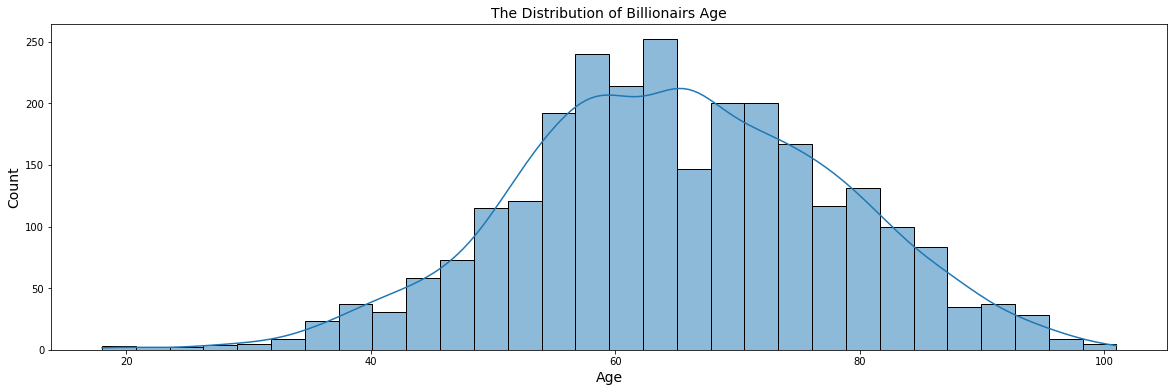

In [0]:
plt.figure(figsize=(20,6))
sns.histplot(data=df.toPandas(), x="age", bins=30, kde=True)
plt.title("The Distribution of Billionairs Age", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)

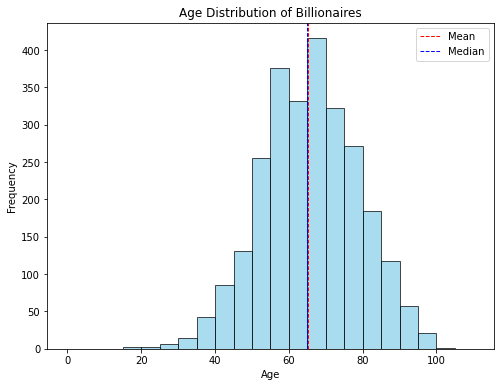

In [0]:
mean_age = df.select(mean('age')).collect()[0][0]
median_age = df.approxQuantile('age', [0.5], 0)[0]  # Approximate median due to large datasets

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df.select('age').rdd.flatMap(lambda x: x).collect(), bins=range(0, int(df.select('age').rdd.max()[0]) + 10, 5), color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1, label='Mean')
plt.axvline(median_age, color='blue', linestyle='--', linewidth=1, label='Median')

plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Inferences:**<br><br>
- We can see that the youngest billionaire is just age 18 and the oldest billionaire is of age 101.<br>
- The age sees a more even spread with the mean and median around the age of 60+. From the distribution, we can see that the majority of the billionaires are 50+ years old in 2023.

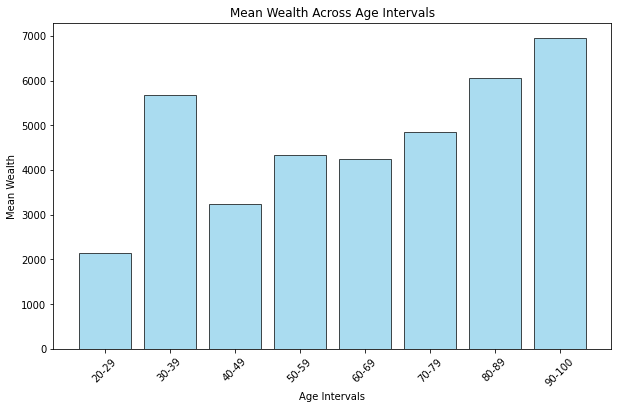

In [0]:
from pyspark.sql import functions as F

# Categorize Age into 10-Year Intervals (20-30, 30-40, ..., 90-100)
df = df.withColumn("age_interval",
    F.when((F.col("age") >= 20) & (F.col("age") < 30), "20-29")
    .when((F.col("age") >= 30) & (F.col("age") < 40), "30-39")
    .when((F.col("age") >= 40) & (F.col("age") < 50), "40-49")
    .when((F.col("age") >= 50) & (F.col("age") < 60), "50-59")
    .when((F.col("age") >= 60) & (F.col("age") < 70), "60-69")
    .when((F.col("age") >= 70) & (F.col("age") < 80), "70-79")
    .when((F.col("age") >= 80) & (F.col("age") < 90), "80-89")
    .when((F.col("age") >= 90) & (F.col("age") <= 100), "90-100")
    .otherwise("Unknown")
    .alias("age_interval")
)

# Group by Age Intervals and Calculate Statistics
age_group_stats = df.groupBy("age_interval").agg(F.mean("finalWorth").alias("mean_wealth")).orderBy("age_interval")

# Convert to Pandas for Plotting
age_group_stats_pd = age_group_stats.toPandas()
age_group_stats_pd_filtered = age_group_stats_pd[age_group_stats_pd['age_interval'] != 'Unknown']

# Plotting the Mean Wealth per Age Interval
plt.figure(figsize=(10, 6))
plt.bar(age_group_stats_pd_filtered['age_interval'], age_group_stats_pd_filtered['mean_wealth'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Mean Wealth Across Age Intervals')
plt.xlabel('Age Intervals')
plt.ylabel('Mean Wealth')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Inferences:**<br><br>
We can see that people above 80 years old have a higehr average wealth, and people with age of 20-29 have the lowest in comparison.

**Visualize Top 10 Categories in Categorical Columns**

In [0]:
cat_col = ['category', 'country', 'city', 'source', 'industries', 'countryOfCitizenship']
geo_cat_col = ['country', 'city', 'countryOfCitizenship']
general_cat_col = ['category', 'source', 'industries']

In [0]:
import plotly.graph_objects as go

pandas_df = df.select("longitude_country", "latitude_country", "personName", "finalWorth").toPandas()

fig = go.Figure(go.Scattergeo(
    lon=pandas_df["longitude_country"],
    lat=pandas_df["latitude_country"],
    text=pandas_df["personName"],
    mode="markers",
    marker=dict(
        size=8,
        opacity=0.6,
        color=pandas_df["finalWorth"],
        colorscale="Rainbow",
        colorbar=dict(title="Final Worth")
    )
))
fig.update_geos(projection_type="natural earth")
fig.update_layout(title="Billionaires' Distribution on World Map")
fig.show()

******************************************
TOP TEN country HAVING MOST BILLIONAIRES
******************************************


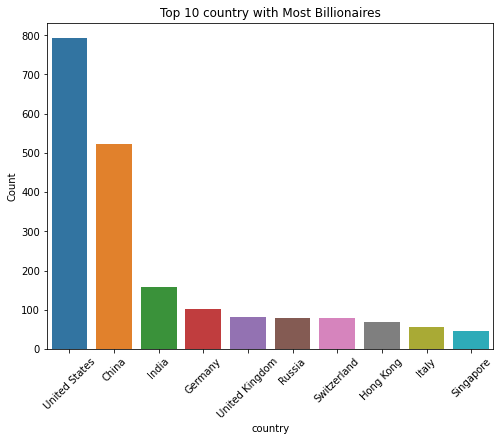

******************************************
TOP TEN city HAVING MOST BILLIONAIRES
******************************************


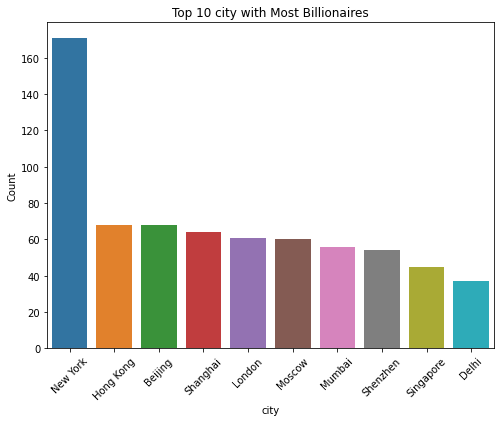

******************************************
TOP TEN countryOfCitizenship HAVING MOST BILLIONAIRES
******************************************


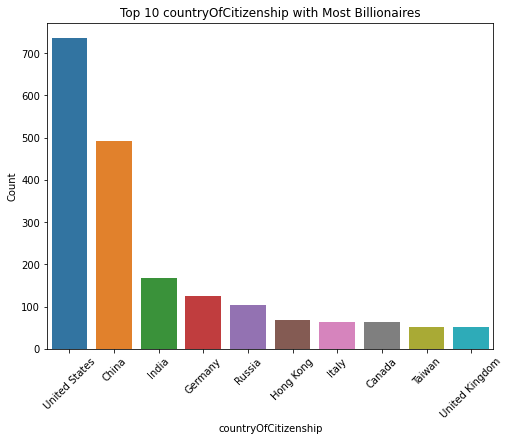

In [0]:
for col in geo_cat_col:
    print('******************************************')
    print(f'TOP TEN {col} HAVING MOST BILLIONAIRES')
    print('******************************************')
    counts_df = df.groupBy(col).count().toPandas()
    counts_df = counts_df.sort_values(by='count', ascending=False).head(10)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(data=counts_df, x=col, y='count')
    plt.title(f"Top 10 {col} with Most Billionaires")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

**Inferences:**<br><br>
- We can identify that the US has the leading number of billionaires, followed by China and India. We can notice that compared to the US and China, the other countries have very few numbers of billionaires.

******************************************
TOP TEN category HAVING MOST BILLIONAIRES
******************************************


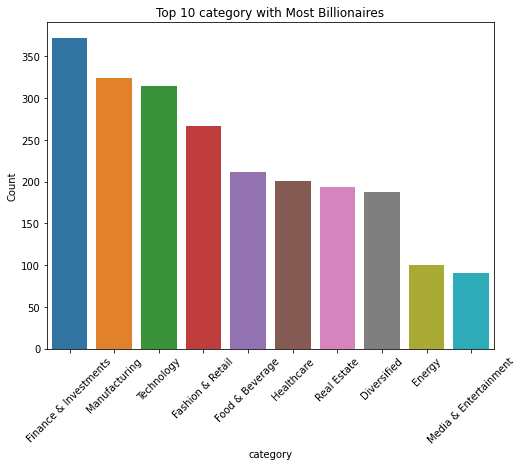

******************************************
TOP TEN source HAVING MOST BILLIONAIRES
******************************************


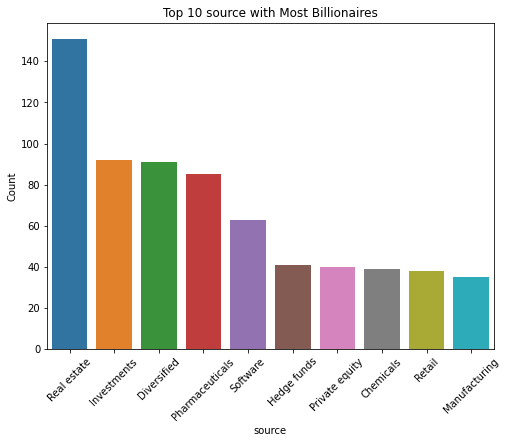

******************************************
TOP TEN industries HAVING MOST BILLIONAIRES
******************************************


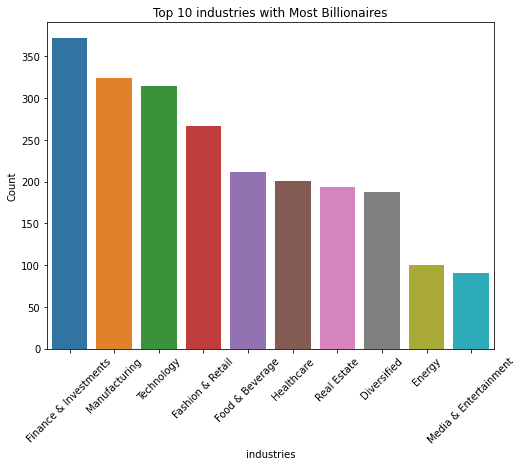

In [0]:
for col in general_cat_col:
    print('******************************************')
    print(f'TOP TEN {col} HAVING MOST BILLIONAIRES')
    print('******************************************')
    counts_df = df.groupBy(col).count().toPandas()
    counts_df = counts_df.sort_values(by='count', ascending=False).head(10)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(data=counts_df, x=col, y='count')
    plt.title(f"Top 10 {col} with Most Billionaires")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

**Inferences:** <br><br>
- We can see that Finance & Investments industry has the more billionaires, followed by manufacturing and technlogy industry.

**Visualize how the wealth is spread among the industries**

In [0]:
import plotly.express as px

fig = px.treemap(df.toPandas(), path=['industries'], values='finalWorth', title='Wealth Distribution by Industry')
fig.update_traces(textinfo="label+percent entry")
fig.show()

/databricks/python/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



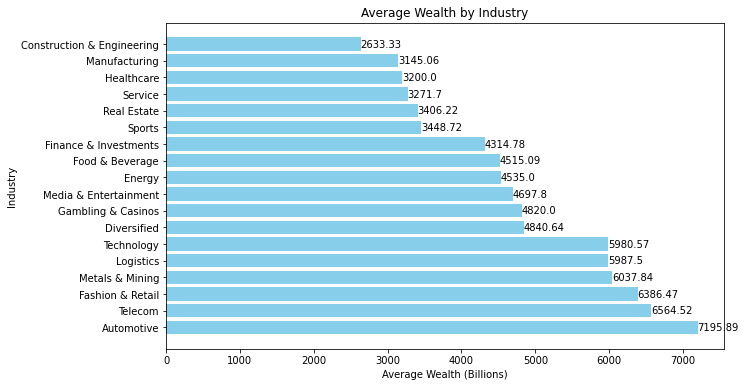

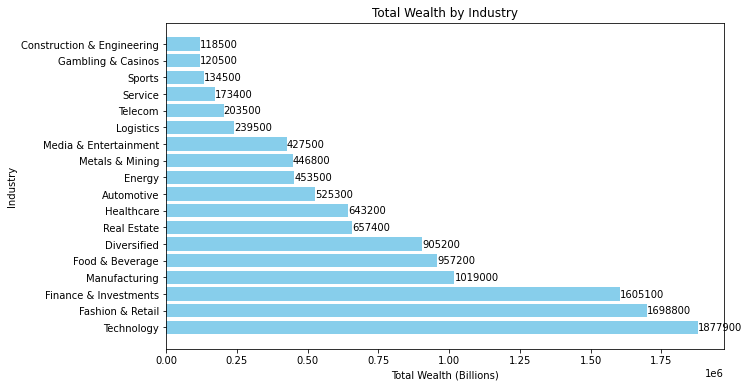

In [0]:
from pyspark.sql import functions as F

# Group by industry and calculate total and average wealth
industry_wealth = df.groupBy('industries') \
    .agg(F.mean('finalWorth').alias('avg_wealth'), F.sum('finalWorth').alias('total_wealth')) \
    .fillna(0)  # Handling null values if present

# Sorting by average wealth in descending order
industry_wealth = industry_wealth.orderBy(F.desc('avg_wealth'))

# Convert PySpark DataFrame to Pandas for plotting
industry_wealth_pd = industry_wealth.toPandas()

# Plotting the average wealth by industry
plt.figure(figsize=(10, 6))
plt.barh(industry_wealth_pd['industries'], industry_wealth_pd['avg_wealth'], color='skyblue')
for index, value in enumerate(industry_wealth_pd['avg_wealth']):
    plt.text(value, index, f'{round(value, 2)}', ha='left', va='center')
plt.title('Average Wealth by Industry')
plt.xlabel('Average Wealth (Billions)')
plt.ylabel('Industry')
plt.show()

# Sorting by total wealth in descending order
industry_wealth = industry_wealth.orderBy(F.desc('total_wealth'))

# Convert PySpark DataFrame to Pandas for plotting
industry_wealth_pd = industry_wealth.toPandas()

# Plotting the total wealth by industry
plt.figure(figsize=(10, 6))
plt.barh(industry_wealth_pd['industries'], industry_wealth_pd['total_wealth'], color='skyblue')
for index, value in enumerate(industry_wealth_pd['total_wealth']):
    plt.text(value, index, f'{round(value, 2)}', ha='left', va='center')
plt.title('Total Wealth by Industry')
plt.xlabel('Total Wealth (Billions)')
plt.ylabel('Industry')
plt.show()

**Inferences**
<br><br>
- Technology industry has the highest total wealth but due to the large number of billionaires in this industry, the average wealth is a little less.<br>
- Whereas the automobile industry has the highest average wealth by industry compared to the other industries but has a little lesser overall wealth showing that only a limited number of billionaires dominate this industry.<br>
- The fashion & and retail industry shows more promise with one of the highest total wealth and also average wealth.

**Visualize Top 3 Countries Contribution to each Industry**

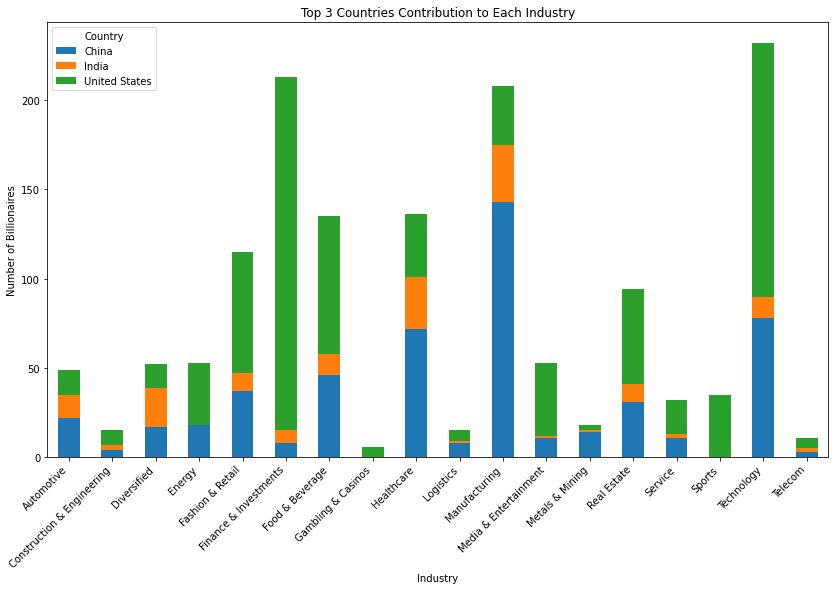

In [0]:
from pyspark.sql.functions import desc

# Identify top 3 countries with the most billionaires
top_countries = df.groupBy("country").count().orderBy(desc("count")).select("country").limit(3)

# Filter the dataset for billionaires from the top 3 countries
top_countries_billionaires = df.join(top_countries, "country", "inner")

# Group by industries and countries to count billionaires per industry in top countries
industry_country_counts = top_countries_billionaires.groupBy("industries", "country").count().orderBy("industries")

# Pivot the data for the stacked bar chart
pivoted = industry_country_counts.groupBy("industries").pivot("country").sum("count").fillna(0)

# Convert to Pandas for plotting
pandas_df = pivoted.toPandas()

# Plotting the stacked bar chart
pandas_df.plot(kind="bar", stacked=True, x="industries", figsize=(14, 8))
plt.title("Top 3 Countries Contribution to Each Industry")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Country")
plt.show()

**Inferences:**<br><br>
- When we look at its contribution to the industries, we can identify that the US is clearly leading in Finance companies, technological companies, etc. While China is leading in manufacturing and healthcare. <br>
- India on the other hand, can be seen to contribute to multiple industries but in a little way.

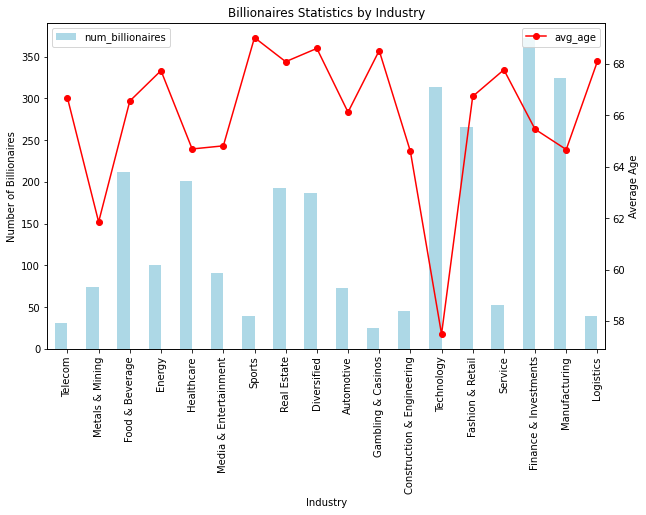

In [0]:
from pyspark.sql.functions import avg

# Calculate the number of billionaires and average age per industry
industry_stats = df.groupBy("industries").agg({"age": "avg"}).withColumnRenamed("avg(age)", "avg_age")
industry_stats = industry_stats.join(df.groupBy("industries").count(), "industries").withColumnRenamed("count", "num_billionaires")

# Drop null values if present
industry_stats = industry_stats.na.drop()

# Convert PySpark DataFrame to Pandas for plotting
pandas_stats = industry_stats.toPandas()

# Plotting the combined plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
pandas_stats.plot(kind="bar", x="industries", y="num_billionaires", ax=ax1, color="lightblue", position=1, width=0.4)
pandas_stats.plot(kind="line", x="industries", y="avg_age", ax=ax2, color="red", marker="o")

ax1.set_ylabel("Number of Billionaires")
ax2.set_ylabel("Average Age")
ax1.set_xlabel("Industry")

plt.title("Billionaires Statistics by Industry")
plt.xticks(rotation=45, ha="right")
plt.show()

**Inferences:** <br><br>

- From the bar chart, we can see that the Finance & Investments, Technology, and Manufacturing industries have the highest number of billionaires.
- Average age is almost constant around 60 years for all the industries. A slightly lesser average age can be noticed for the technology industry around 55 years old.

**Visualize Relationship between Gender, Wealth, and Industries**

In [0]:
fig = px.treemap(df.toPandas(), path=['gender', 'industries'], values='finalWorth')
fig.update_traces(textinfo="label+percent entry")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

/databricks/python/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/databricks/python/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



**Inferences:** <br><br>

- From the bar chart, we can see that technology industry contributed the most male billionaire, followed by finance & investments and fashion & retails.<br>
- Meanwhile fashion & retails industry contributed the most female billionaire.

**Worth Distribution**

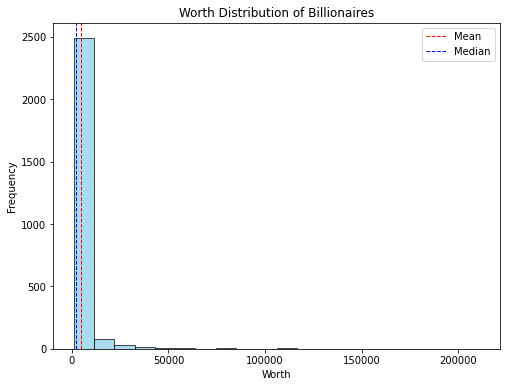

In [0]:
# Calculate mean and median using PySpark
mean_value = df.select(mean('finalWorth')).collect()[0][0]
median_value = df.approxQuantile('finalWorth', [0.5], 0)[0]  # Approximate median due to large datasets

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df.select('finalWorth').rdd.flatMap(lambda x: x).collect(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1, label='Mean')
plt.axvline(median_value, color='blue', linestyle='--', linewidth=1, label='Median')

plt.title('Worth Distribution of Billionaires')
plt.xlabel('Worth')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Inferences:**<br><br>
In the wealth we can see both the mean and median are just around 4.5 billion whereas the highest is 211 billion. This shows how wide the spread is between the top of the wealthiest billionaires and the average billionaire.

**Identify how much vast difference is between the ranks of billionaires**

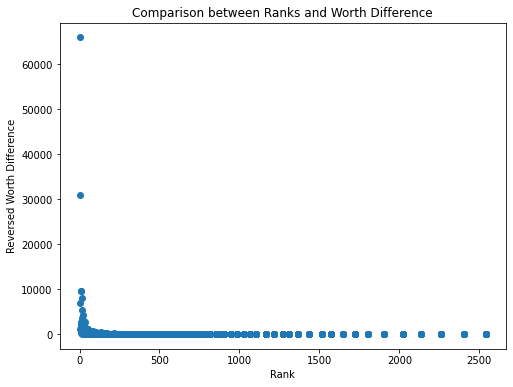

In [0]:
from pyspark.sql import Window
from pyspark.sql.functions import lag, col

# Define a window specification to order by 'rank'
windowSpec = Window.orderBy("rank")

# Calculate the reversed worth difference between consecutive ranks
df = df.withColumn("worth_difference", (lag("finalWorth", 1).over(windowSpec) - col("finalWorth")))

# Visualize the spread of the reversed difference in wealth between the billionaires
worth_diff_pd = df.select('rank', 'worth_difference').toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(worth_diff_pd['rank'], worth_diff_pd['worth_difference'])
plt.title('Comparison between Ranks and Worth Difference')
plt.xlabel('Rank')
plt.ylabel('Reversed Worth Difference')
plt.show()

**Inferences:**<br><br>
- Based on the scatter plot, we can see that the worth difference between the top 3 richest billionaires are quite large.<br>
- While thos who ranked between 3-1200 have very small worth difference between their former ranker and latter ranker.<br>
- Meanwhile the worth difference for ranker after 1200 are bigger compare to ranker between 3-1200.

In [0]:
num_col = [col_name for col_name in df.columns if col_name not in cat_col]
excluded_cols = ["gender", "status", "selfMade"]
num_col = [col_name for col_name in df.columns if col_name not in excluded_cols]

**Correlation between Age, Final Worth, and Tax Rate**

In [0]:
import plotly.express as px

fig_age = px.scatter(df.toPandas(), x='age', y='finalWorth', color='gender')
fig_age.update_layout(title='Age vs Final Worth')

fig_tax = px.scatter(df.toPandas(), x='total_tax_rate_country', y='finalWorth', color='gender')
fig_tax.update_layout(title='Total Tax Rate vs Final Worth')

fig_age.show()
fig_tax.show()

In [0]:
fig = px.scatter_3d(df.toPandas(), x='age', y='finalWorth', z='total_tax_rate_country', color='gender')
fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='Final Worth', zaxis_title='Total Tax Rate'))
fig.show()

**Inferences:**<br><br>
- Based on the scatter plot of Age vs Final Worth, we can see that most of the billionaires are within age of 40 to 90, where billionaires within age of 60-80 has more billionaire with higher final worth.<br>
- Based on the scatter plot of Total Tax Rate vs Final Worth, we can see that most of the countries' tax rates are within range of 20 to 60.<br>
- Whereas countries with total tax rate of 36.6 has the most amount of richer billionaires.<br>
- Based on the 3D scatter plot, we can see that most of the instances are concentrated between range of: 20-80 total tax rate and 1000-12k final worth.

**Relationship between Tax Revenue, Tax Rate, and Life Expectancy**

In [0]:
fig = px.scatter(df.toPandas(), x='tax_revenue_country_country', y='total_tax_rate_country', color='life_expectancy_country',
                 labels={'tax_revenue_country_country': 'Tax Revenue Country', 'total_tax_rate_country': 'Total Tax Rate Country'})

fig.show()

**Inferences:** <br><br>
- Tax Revenue and Total Tax Rate: A higehr tax revenue correlated with higher total tax rates.<br>
- Life Expectancy and Tax Variables: The color variation based on the life expectancy suggests that there is a correlation between these two factors, where tax revenue around 10 to 25 have a higher life expectancy.<br>

**Relationship between several numerical variables**

Out[53]: <seaborn.axisgrid.JointGrid at 0x7f968c79f3d0>

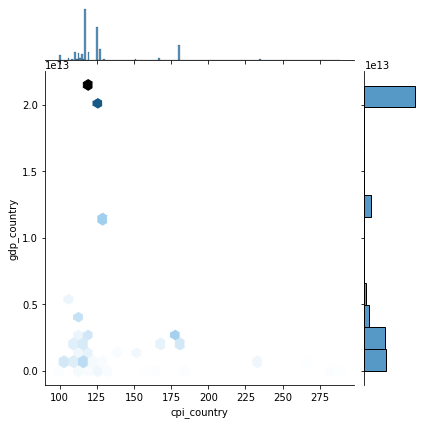

In [0]:
sns.jointplot(data=df.toPandas(), x='cpi_country', y='gdp_country', kind='hex')

**Inferences:**<br><br>
- Based on the joint plot above, we can say that GDP and CPI of a country are somewhat related. A higher GDP indicates a stronger economy, which results in higher CPI. <br>
- We can say that a growing GDP can often be associated with a higher CPI of a country.

Out[54]: <AxesSubplot:xlabel='cpi_country', ylabel='cpi_change_country'>

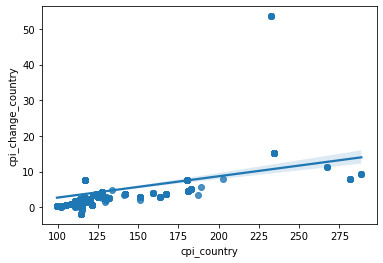

In [0]:
sns.regplot(data=df.toPandas(),x='cpi_country',y='cpi_change_country')

Out[55]: <AxesSubplot:xlabel='cpi_country', ylabel='life_expectancy_country'>

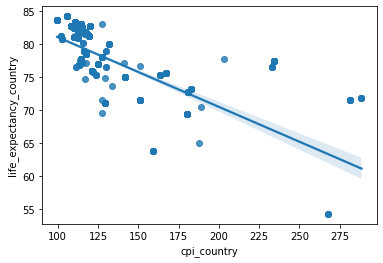

In [0]:
sns.regplot(data=df.toPandas(),x='cpi_country',y='life_expectancy_country')

Out[56]: <AxesSubplot:xlabel='cpi_country', ylabel='gross_tertiary_education_enrollment'>

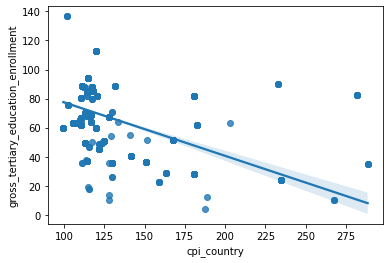

In [0]:
sns.regplot(data=df.toPandas(),x='cpi_country',y='gross_tertiary_education_enrollment')

**Inferences:**<br><br>
- Based on the regplot for cpi_change_country vs cpi_country, the relationship between both variables are slightly positive, where the MSE is quite low, which means the instances are concentrated the the linear line.<br>
- Based on the regplot of life_expectancy_country vs cpi_country, the relationship is strong negative, where the lower the cpi of a country, the greater the life expectancy of that country, which is ideal.<br>
- Based on the regplot of gross_tertiary_education_enrollment vs cpi_country, the relationship is slightly negative, which the greater the gross of tertiary education enrollment, the lower the cpi of tha country, which means the more advance the country is in term of education, the greater the quality of life for the nations. 

Out[57]: <AxesSubplot:>

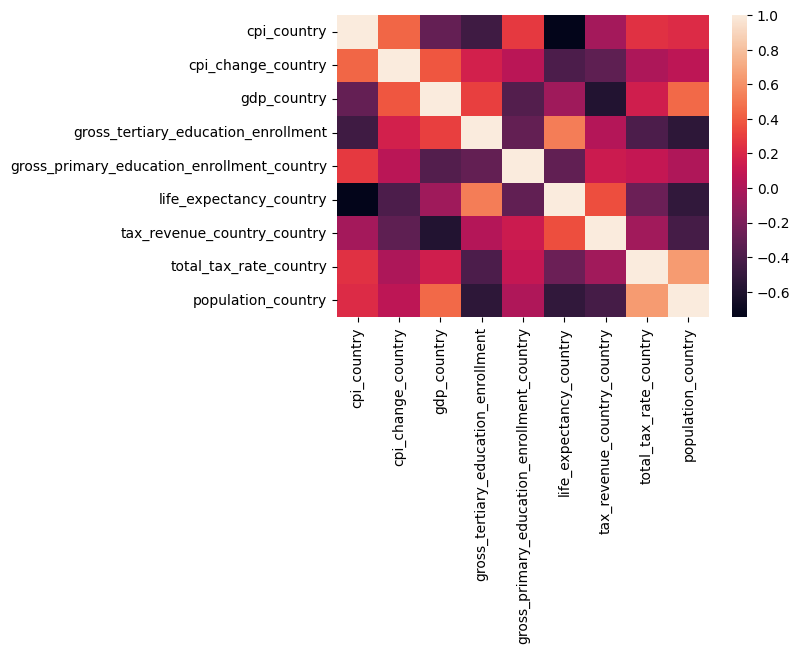

In [0]:
plt.figure(dpi=100)
sns.heatmap(df[['cpi_country', 'cpi_change_country', 'gdp_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country']].toPandas().corr())

**T-Test**

In [0]:
# Gender and Final Worth
from math import sqrt
from scipy import stats

group1 = df.filter(df['gender'] == 'M').select('finalWorth')
group2 = df.filter(df['gender'] == 'F').select('finalWorth')

values_group1 = [row.finalWorth for row in group1.collect()]
values_group2 = [row.finalWorth for row in group2.collect()]

# T-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(values_group1, values_group2, equal_var=False)  # Assuming unequal variance
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 0.1317332557717519, p-value: 0.8952455467129027


**Inferences:**<br><br>
- Based on the result of t-test, we cannot reject the null hypothesis.<br>
- Since the p-value is higher than the significance level (0.05), the test suggests that the gender of billionairs does not have a significant impact on their final worth, which means the wealth distribution among male and female billionaires appears to be similar. 

In [0]:
# Self-Made Status and Final Worth
group1 = df.filter(df['selfMade'] == 'True').select('finalWorth')
group2 = df.filter(df['selfMade'] == 'False').select('finalWorth')

values_group1 = [row.finalWorth for row in group1.collect()]
values_group2 = [row.finalWorth for row in group2.collect()]

# T-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(values_group1, values_group2, equal_var=False)  # Assuming unequal variance
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -1.1728549679021418, p-value: 0.24104680345497453


**Inferences:**<br><br>
- The t-statistics of -1.1729 indicates that the difference between the two groups is 1.1729 standard errors. <br>
- The p-value of 0.241 is greater than the significance level, suggesting that there is no strong eveidence to reject the null hypothesis.<br>
- This indicates that there's no significant difference in the final worth between self-made and inherited billionaires.

**Corelation Test for Rank and Final Worth**

In [0]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Assuming you have a DataFrame 'df' with columns 'rank' and 'finalWorth'
assembler = VectorAssembler(inputCols=['rank', 'finalWorth'], outputCol='features')
output = assembler.transform(df).select('features')

# Correlation test (Pearson)
pearson_corr = Correlation.corr(output, 'features').head()
print("Pearson correlation:\n {}".format(str(pearson_corr[0])))

Pearson correlation:
 DenseMatrix([[ 1.        , -0.44892958],
             [-0.44892958,  1.        ]])


**Inferences:**<br><br>
- The Pearson correlation coefficient matrics indicates a moderate negative correlation of around -0.45 between rank and final worth.<br>
- This is ideal, as it suggests that billionaires with higher ranking tend to have higher final worth.

**Relationships between Country and Final Worth**

**ANOVA Test**

In [0]:
from scipy.stats import f_oneway

# Assuming df is your PySpark DataFrame
worth_by_country = [
    df.filter(df['Country'] == country).select('finalWorth').toPandas()['finalWorth']
    for country in df.select('Country').distinct().rdd.flatMap(lambda x: x).collect()
]

f_stat, p_value = f_oneway(*worth_by_country)

print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 1.143179541154338, p-value: 0.1877376208748044


**Inferences:**<br><br>
- The obtained F-statistic suggests that the variance among the groups (countries) is relatively low compared to the variance within each group.<br>
-  The p-value is higher than 0.05 (assuming a 95% confidence level), it implies there's not enough evidence to reject the null hypothesis, indicating that there might not be a significant difference in the final worth among billionaires from different countries.

#### Machine Learning

In this section, we performed some simple machine learning algorithm. The focus is on investigate the most important features that contributed to the dataset.

**Convert string variables to numeric variables**

In [0]:
from pyspark.ml.feature import StringIndexer

def str_to_index(df):
    data = df
    for col in data.dtypes:
        if col[1] == 'string':
            indexer = StringIndexer(inputCol=col[0], outputCol= col[0] + 'Index')
            indexed = indexer.fit(data).transform(data)
            data = indexed.drop(col[0])

    return data

df_str_index = str_to_index(df2)

String variables are converted to numerical forms to be trainable by machine learning models.

In [0]:
df_str_index.show(5, vertical = True)

-RECORD 0----------------------------------------------------
 rank                                       | 466            
 finalWorth                                 | 5500           
 age                                        | 81             
 birthYear                                  | 1941           
 birthMonth                                 | 6              
 birthDay                                   | 4              
 cpi_country                                | 112.85         
 cpi_change_country                         | 1.4            
 gdp_country                                | 3845630030824  
 gross_tertiary_education_enrollment        | 70.2           
 gross_primary_education_enrollment_country | 104.0          
 life_expectancy_country                    | 80.9           
 tax_revenue_country_country                | 11.5           
 total_tax_rate_country                     | 48.8           
 population_country                         | 83132799       
 latitud

**Feature Engineering and Data Splitting**

In [0]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

# assemble the features
assembler = VectorAssembler(inputCols = [col for col in df_str_index.columns[2:]], outputCol = 'assembled_features')

# normalize the data
scaler = MinMaxScaler(inputCol="assembled_features",outputCol="scaled_features")

# split the data
train_data, test_data = df_str_index.randomSplit([0.8, 0.2], seed = 42)

**Steps for Feature Engineering and Data Splitting**
1. Assemble the features into an array
2. Normalize the data using MinMax scaler
3. Split the data into train and test dataset

**Simple Linear Regression**

In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# create Linear Regression model
lr = LinearRegression(featuresCol='scaled_features', labelCol='finalWorth')

# Create a pipeline with the assembler and the Linear Regression model
pipeline = Pipeline(stages=[assembler, scaler, lr])

# Train the model
model = pipeline.fit(train_data)

# do predictions
predictions = model.transform(test_data)

# Evaluate the model using RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="finalWorth", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print(f"Mean Squared Error (MSE): {mse}")

# R-squared
evaluator_r2 = RegressionEvaluator(labelCol="finalWorth", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 94821935.77324365
R-squared: 0.0212862213414301


In [0]:
predictions.select("finalWorth", "prediction").show()

+----------+------------------+
|finalWorth|        prediction|
+----------+------------------+
|    114000|   6024.1538675946|
|     94500|6599.3512431746185|
|     83400| 3628.499396843116|
|     76000| 5441.074730879957|
|     57600| 6838.992100280666|
|     47200| 4217.848800792031|
|     38900| 6040.016847384344|
|     35000| 6324.780857435395|
|     29700| 6615.964386806505|
|     29500|  7233.68378572116|
|     28500| 5133.261516311008|
|     27800| 6337.356278984003|
|     27000| 3662.941441632964|
|     25500| 3779.718329766728|
|     23500| 3494.412072031627|
|     22100| 5625.153312942022|
|     21000| 7676.949753985358|
|     16500| 5861.329401589752|
|     15500| 4699.329744455743|
|     14900| 5457.697348715058|
+----------+------------------+
only showing top 20 rows



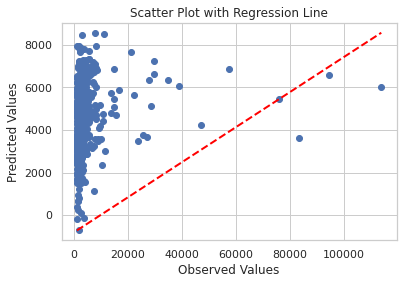

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

y_observed = [row.finalWorth for row in test_data.collect()]
y_predicted = [row.prediction for row in predictions.collect()]

plt.scatter(y_observed, y_predicted)
plt.plot([min(y_observed), max(y_observed)], [min(y_predicted), max(y_predicted)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot with Regression Line")
plt.show()

In [0]:
# Get feature coefficients
coefficients = model.stages[-1].coefficients.toArray()

# Get the indices of the top 10 most important features
top_10_feature_indices = coefficients.argsort()[-10:][::-1]

# Get the feature names from the schema of train_data
feature_names = [train_data.columns[i] for i in top_10_feature_indices]

# Print the top 10 most important features
print("Top 10 Most Important Features based on Coefficients:")
for name in feature_names:
    print(name)

Top 10 Most Important Features based on Coefficients:
rank
finalWorth
latitude_country
life_expectancy_country
total_tax_rate_country
countryIndex
birthYear
categoryIndex
age
cpi_change_country


**Inferences:**

The results above shows the prediction of Linear Regression. We can see that it is not well predicted. One of the reasons could be the number of data is insuficient for the model to train efficiently. Besides that, there are too many number of variables.

**Random Forest Regressor**

In [0]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# Create a RandomForestRegressor
rf = RandomForestRegressor(featuresCol="scaled_features", labelCol="finalWorth", maxBins=3000)

# Create a pipeline with the assembler, scaler, and RandomForestRegressor
pipeline = Pipeline(stages=[assembler, scaler, rf])

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Access the feature importances
feature_importances = model.stages[-1].featureImportances

# Get the indices of the top 10 most important features
top_10_feature_indices = feature_importances.toArray().argsort()[-10:][::-1]

# Get the feature names from the schema of train_data
feature_names = [train_data.columns[i] for i in top_10_feature_indices]

# Evaluate the model
mse_evaluator = RegressionEvaluator(labelCol="finalWorth", predictionCol="prediction", metricName="mse")
mse = mse_evaluator.evaluate(predictions)
print(f"Mean Squared Error (MSE): {mse}")

r2_evaluator = RegressionEvaluator(labelCol="finalWorth", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 98800941.52260773
R-squared: -0.01978347124085489


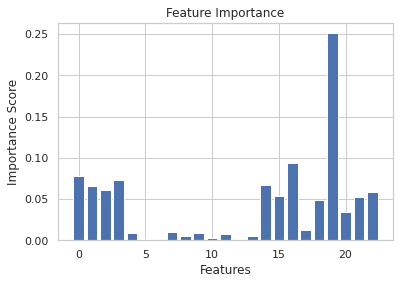

In [0]:
features = [i for i in range(len(feature_importances))]

plt.bar(features, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()

The graph above shows the feature importance, indicating relative importance of each feature when building the model.

In [0]:
# Print the top 10 most important features
print("Top 10 Most Important Features:")
for name in feature_names:
    print(name)

Top 10 Most Important Features:
countryIndex
longitude_country
rank
birthYear
population_country
finalWorth
age
industriesIndex
latitude_country
sourceIndex


**K-means Clustering**

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import ClusteringEvaluator

# Create a KMeans model
kmeans = KMeans(featuresCol="scaled_features", predictionCol="cluster", k=3)

# Create a pipeline with the assembler and the KMeans model
pipeline = Pipeline(stages=[assembler, scaler, kmeans])

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate
evaluator = ClusteringEvaluator(predictionCol="cluster", featuresCol="scaled_features", metricName="silhouette")
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.3642878521576143


In [0]:
import plotly.express as px

clustered_data_3d = predictions.select("scaled_features", "cluster").toPandas()

# Extract features from the scaled features vector
clustered_data_3d["feature1"] = clustered_data_3d["scaled_features"].apply(lambda x: x[0])
clustered_data_3d["feature2"] = clustered_data_3d["scaled_features"].apply(lambda x: x[1])
clustered_data_3d["feature3"] = clustered_data_3d["scaled_features"].apply(lambda x: x[2])

# Create 3D scatter plot colored by cluster
fig = px.scatter_3d(clustered_data_3d, x="feature1", y="feature2", z="feature3", color="cluster", opacity=0.7, size_max=5)
fig.update_layout(title="K-Means Clustering Results (3D)")
fig.show()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning:

toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field scaled_features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.

